In [2]:
import skimage
import cv2
import numpy as np
from PIL import Image,ImageFilter
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt

In [3]:
img=Image.open('owl_sample.jpg')

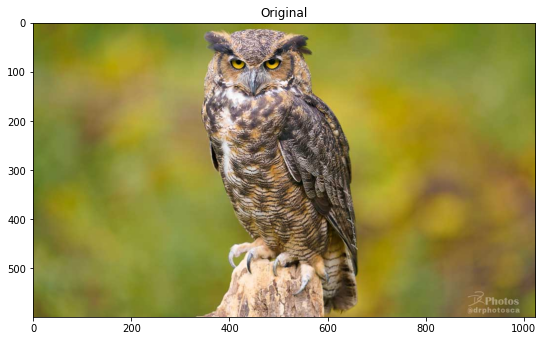

In [4]:
plt.figure(figsize=(9,8))
plt.imshow(img)
plt.title('Original')
plt.show()

## Generally images are converted to grayscale because computationally they are easy to work with
## We also resize the image to reduce the input size

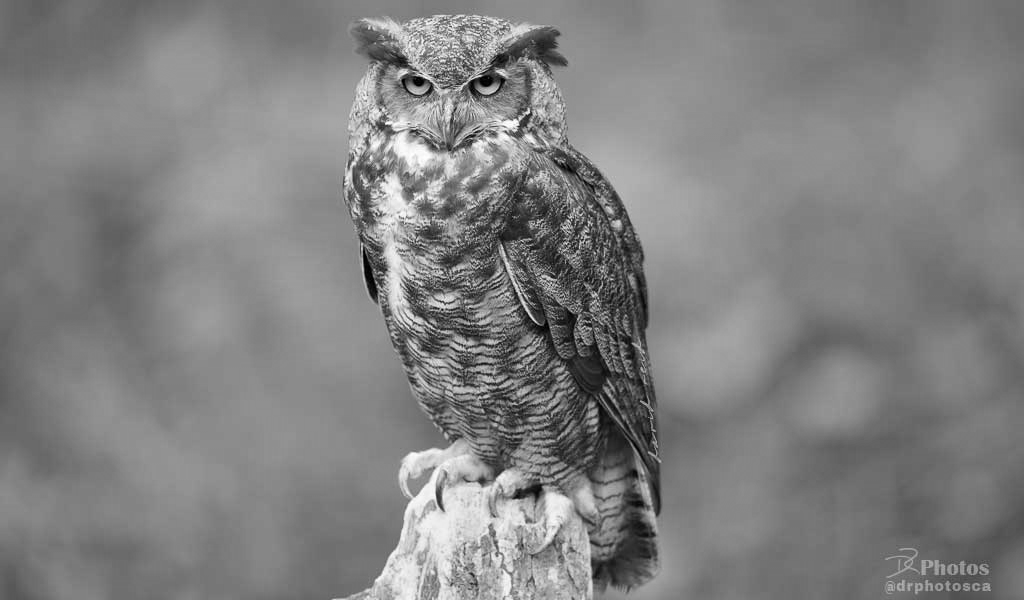

In [5]:
gray_img=img.convert(mode='L')
gray_img

In [6]:
gray_img.size

(1024, 600)

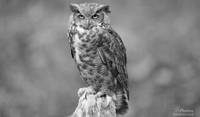

In [8]:
gray_img.thumbnail((200,200))
gray_img

In [9]:
gray_img.size

(200, 117)

### Another way is to use resize(). This loses the aspect ratio(Crop)

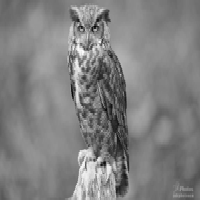

In [11]:
gray_img_resize=gray_img.resize((200,200))
gray_img_resize

In [13]:
hoz_flip=img.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip=img.transpose(Image.FLIP_TOP_BOTTOM)

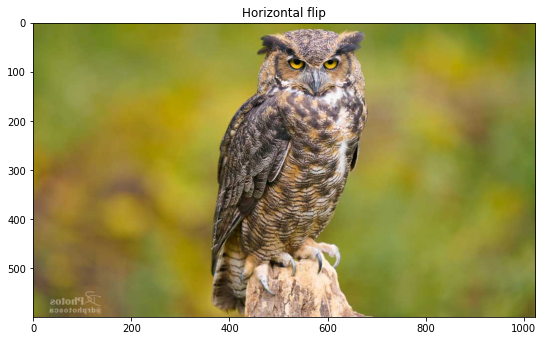

In [14]:
plt.figure(figsize=(9,8))
plt.imshow(hoz_flip)
plt.title('Horizontal flip')
plt.show()

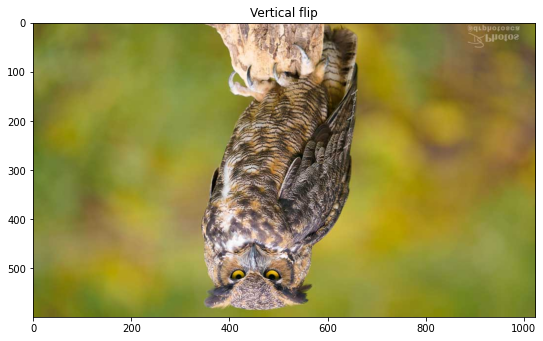

In [15]:
plt.figure(figsize=(9,8))
plt.imshow(ver_flip)
plt.title('Vertical flip')
plt.show()

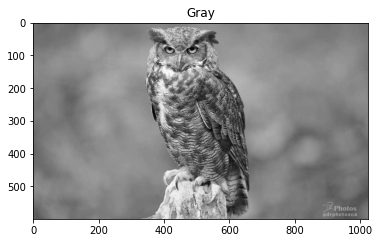

In [16]:
from skimage.color import rgb2gray
img_arr=np.array(img)
img_gray=rgb2gray(img_arr)
plt.figure(figsize=(6,6))
plt.title("Gray")
plt.imshow(img_gray,cmap='gray')

In [17]:
img_gray.shape

(600, 1024)

In [20]:
from skimage.transform import resize
img_resized=resize(img_arr,output_shape=(224,224),anti_aliasing=True)

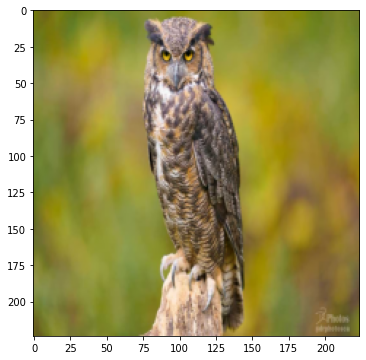

In [22]:
plt.figure(figsize=(6,6))
plt.imshow(img_resized,cmap='gray')

In [23]:
patches=image.extract_patches_2d(img_arr,(64,64))
patches.shape

(516057, 64, 64, 3)

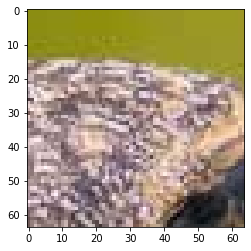

In [27]:
plt.imshow(patches[450])

In [28]:
from skimage import data,io,filters
image=data.coins()
print(image) 

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


In [29]:
image.shape

(303, 384)

## Sobel Algorithm finds out the edges by detecting the discontinuities 

In [31]:
edges=filters.sobel(image)
print(edges)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17208326 0.04307036 ... 0.03683979 0.00765711 0.        ]
 [0.         0.06139791 0.02499519 ... 0.084638   0.00490196 0.        ]
 ...
 [0.         0.03114192 0.02949335 ... 0.01669548 0.00588235 0.        ]
 [0.         0.04030354 0.0335059  ... 0.00571662 0.00980392 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<function matplotlib.pyplot.show(*args, **kw)>

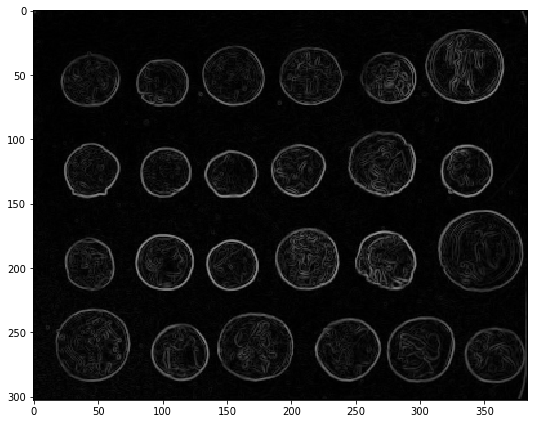

In [32]:
plt.figure(figsize=(12,6))
io.imshow(edges)
plt.show

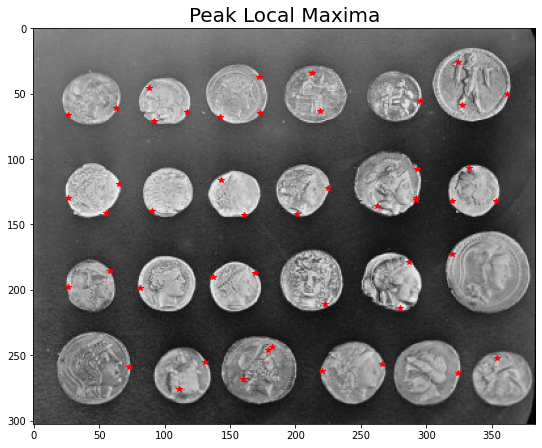

In [34]:
from skimage.feature import peak_local_max
coordinates=peak_local_max(image,min_distance=20)
fig,axes=plt.subplots(figsize=(9,8))
axes.imshow(image,cmap=plt.cm.gray)
axes.plot(coordinates[:,1],coordinates[:,0],'r*')
axes.set_title("Peak Local Maxima",fontsize=20)
plt.show()